In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import pickle
with open('./data/LSOA_stats.pkl', 'rb') as f:
    LSOA_stats = pickle.load(f)

In [3]:
LSOA_stats

,LSOA,median,mean,count,std,p25,p75,min,max,impact,geo_label,borough
0,E01001689,-0.208143,-0.108839,56.0,0.249935,-0.238987,-0.084531,-0.338633,0.732093,0,NaN,NaN
1,E01002011,-0.056827,0.047123,151.0,0.313697,-0.170445,0.144705,-0.319638,1.113375,0,Haringey 030D,Haringey
2,E01004344,-0.105432,-0.027866,251.0,0.252866,-0.163725,0.020525,-0.358859,1.048780,0,Waltham Forest 008B,Waltham Forest
3,E01003263,-0.120297,0.023746,68.0,0.371786,-0.228595,0.215092,-0.349130,1.087461,0,Lewisham 023A,Lewisham
4,E01000433,-0.137795,-0.025408,41.0,0.371103,-0.315720,0.159233,-0.441234,0.816692,0,Bexley 008F,Bexley
...,...,...,...,...,...,...,...,...,...,...,...,...
4952,E01004587,-0.365760,-0.365760,2.0,0.081297,-0.394503,-0.337017,-0.423246,-0.308274,0,Wandsworth 009D,Wandsworth
4953,E01000584,-0.322117,-0.322117,1.0,NaN,-0.322117,-0.322117,-0.322117,-0.322117,0,Brent 033E,Brent
4954,E01003629,-0.392666,-0.392666,1.0,NaN,-0.392666,-0.392666,-0.392666,-0.392666,0,Newham 015E,Newham
4955,E01001585,-0.382158,-0.382158,1.0,NaN,-0.382158,-0.382158,-0.382158,-0.382158,0,Greenwich 016B,Greenwich


In [4]:
world = gpd.read_file('./data/infuse_lsoa_lyr_2011.shp')
london_LSOA_geo = world[world.geo_code.isin(LSOA_stats.LSOA)]

<AxesSubplot:>

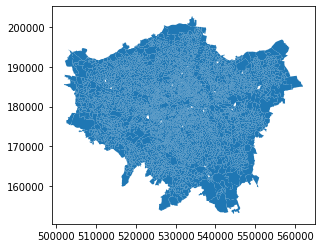

In [5]:
london_LSOA_geo.plot()

In [6]:
london_LSOA_geo.head()

,geo_code,geo_label,geo_labelw,label,name,geometry
0,E01003513,Newham 035D,None,E92000001E09000025E01003513,Newham 035D,"POLYGON ((541893.189 181249.621, 541900.568 18..."
3,E01001159,Croydon 002C,None,E92000001E09000008E01001159,Croydon 002C,"POLYGON ((532233.977 170474.976, 532229.824 17..."
7,E01002714,Islington 017D,None,E92000001E09000019E01002714,Islington 017D,"POLYGON ((530778.966 184215.275, 530780.181 18..."
8,E01002061,Haringey 036A,None,E92000001E09000014E01002061,Haringey 036A,"POLYGON ((531269.550 188183.770, 531269.914 18..."
11,E01000696,Bromley 007E,None,E92000001E09000006E01000696,Bromley 007E,"POLYGON ((544100.850 170609.733, 544142.301 17..."


In [7]:
london_LSOA_geo =pd.merge(london_LSOA_geo, LSOA_stats,  left_on='geo_code', right_on='LSOA')

In [8]:
london_LSOA_geo.head()

,geo_code,geo_label_x,geo_labelw,label,name,geometry,LSOA,median,mean,count,std,p25,p75,min,max,impact,geo_label_y,borough
0,E01003513,Newham 035D,None,E92000001E09000025E01003513,Newham 035D,"POLYGON ((541893.189 181249.621, 541900.568 18...",E01003513,-0.224535,-0.141502,40.0,0.265293,-0.285316,-0.137120,-0.336344,0.894112,0,Newham 035D,Newham
1,E01001159,Croydon 002C,None,E92000001E09000008E01001159,Croydon 002C,"POLYGON ((532233.977 170474.976, 532229.824 17...",E01001159,-0.159885,-0.017743,70.0,0.354303,-0.223540,0.051143,-0.461480,0.832640,0,Croydon 002C,Croydon
2,E01002714,Islington 017D,None,E92000001E09000019E01002714,Islington 017D,"POLYGON ((530778.966 184215.275, 530780.181 18...",E01002714,-0.183521,0.065751,39.0,0.473958,-0.235692,0.098991,-0.387202,1.113637,0,Islington 017D,Islington
3,E01002061,Haringey 036A,None,E92000001E09000014E01002061,Haringey 036A,"POLYGON ((531269.550 188183.770, 531269.914 18...",E01002061,-0.176935,-0.176935,2.0,0.318526,-0.289551,-0.064319,-0.402167,0.048297,0,Haringey 036A,Haringey
4,E01000696,Bromley 007E,None,E92000001E09000006E01000696,Bromley 007E,"POLYGON ((544100.850 170609.733, 544142.301 17...",E01000696,-0.060323,0.030046,204.0,0.272999,-0.164070,0.104901,-0.363840,0.988573,0,Bromley 007E,Bromley


<AxesSubplot:>

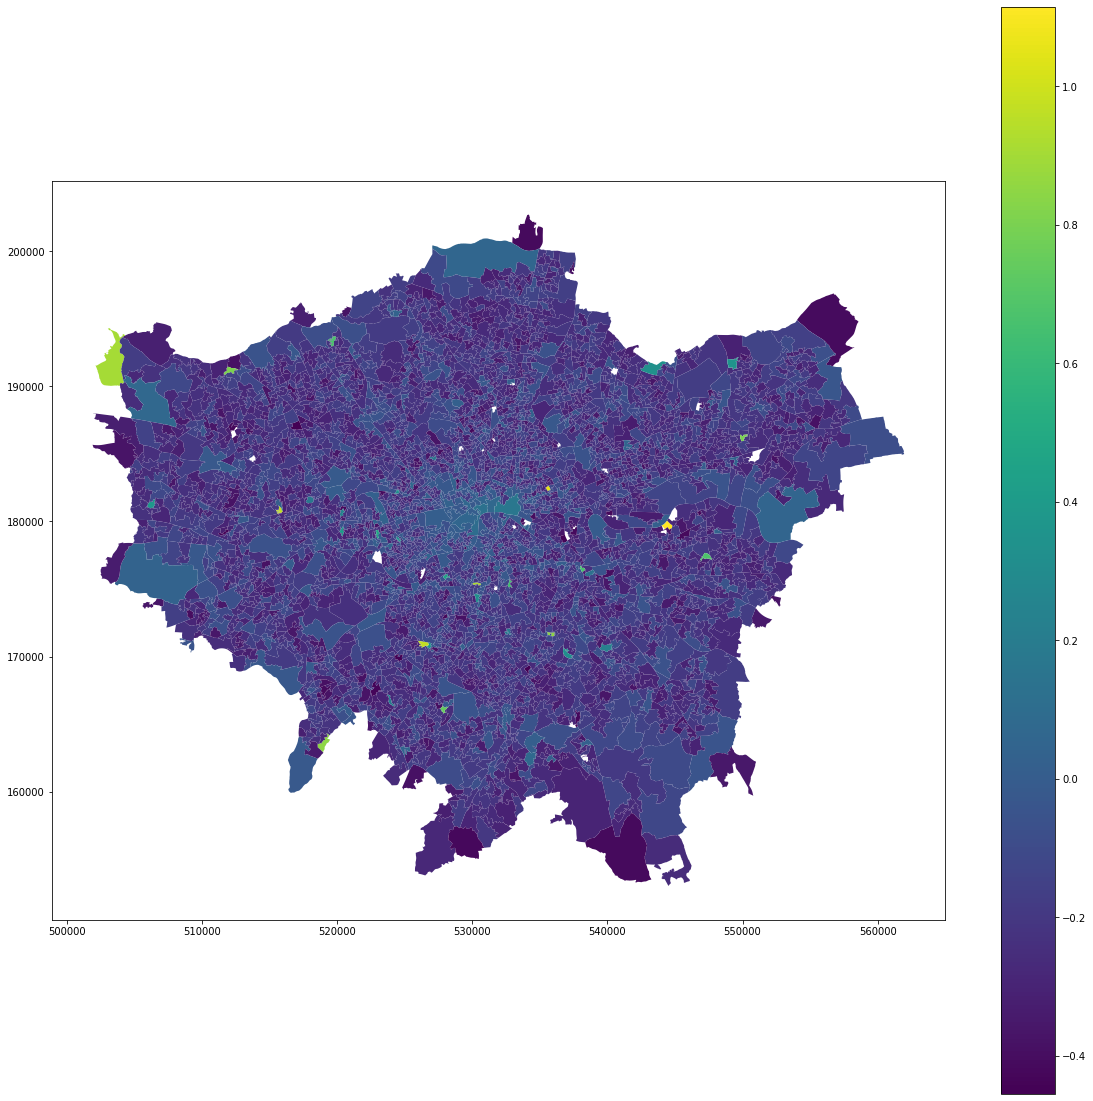

In [9]:

pd.options.display.max_columns = None

fig, ax = plt.subplots(1, 1, figsize=(20, 20))

london_LSOA_geo['coords'] = london_LSOA_geo['geometry'].apply(lambda x: x.representative_point().coords[:])
london_LSOA_geo['coords'] = [coords[0] for coords in london_LSOA_geo['coords']]
london_LSOA_geo.plot(ax=ax,column='median',legend=True)
# for idx, row in london_LSOA_geo.iterrows():
#     plt.annotate(text=row['name'], xy=row['coords'],
#                  horizontalalignment='center')

<AxesSubplot:>

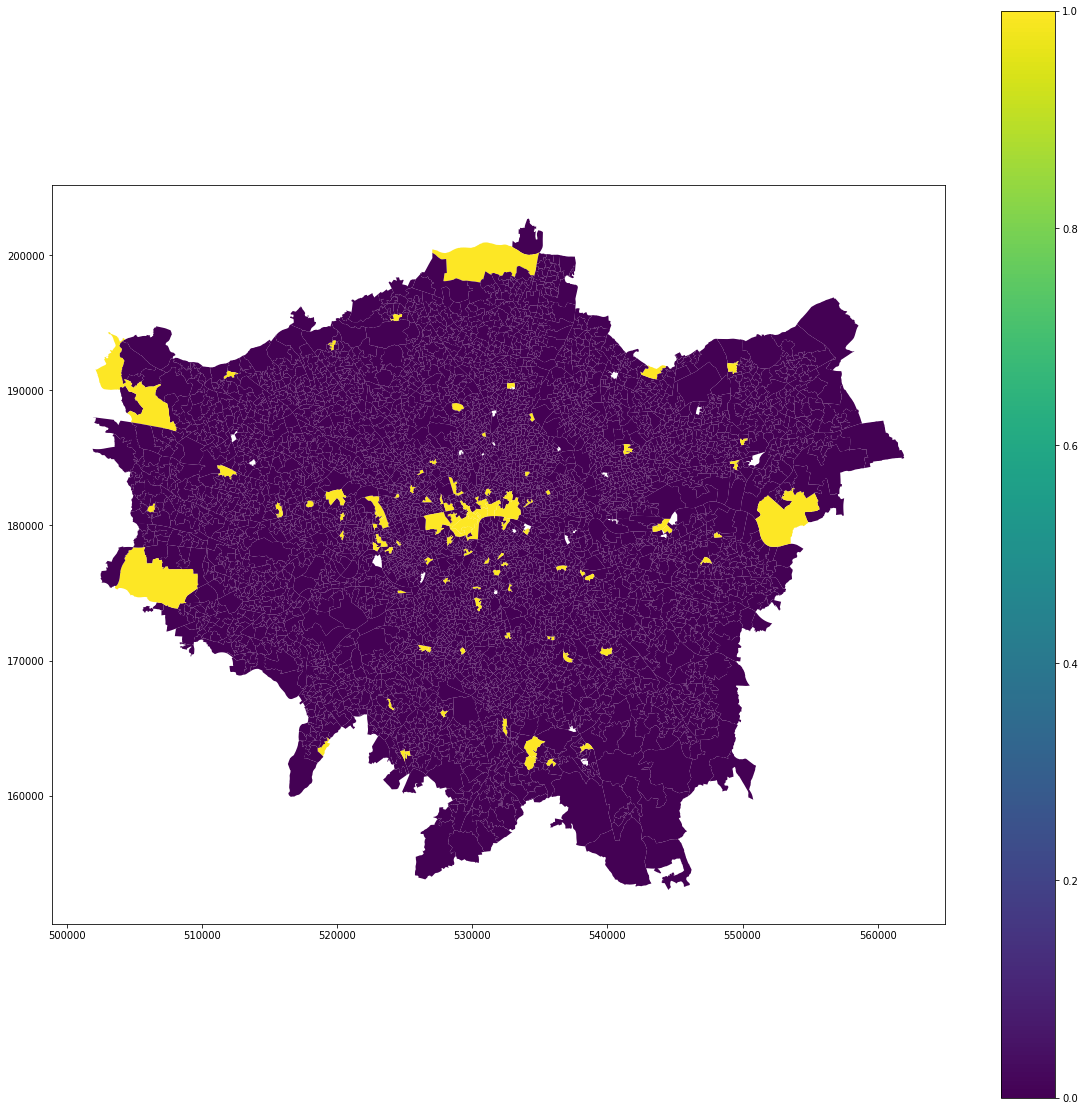

In [10]:
pd.options.display.max_columns = None

fig, ax = plt.subplots(1, 1, figsize=(20, 20))

london_LSOA_geo['coords'] = london_LSOA_geo['geometry'].apply(lambda x: x.representative_point().coords[:])
london_LSOA_geo['coords'] = [coords[0] for coords in london_LSOA_geo['coords']]
london_LSOA_geo.plot(ax=ax,column='impact',legend=True)
# for idx, row in london_LSOA_geo.iterrows():
#     plt.annotate(text=row['name'], xy=row['coords'],
#                  horizontalalignment='center')

In [11]:
df_boroughs = gpd.read_file('./data/london_boroughs.json')
len(df_boroughs)

33

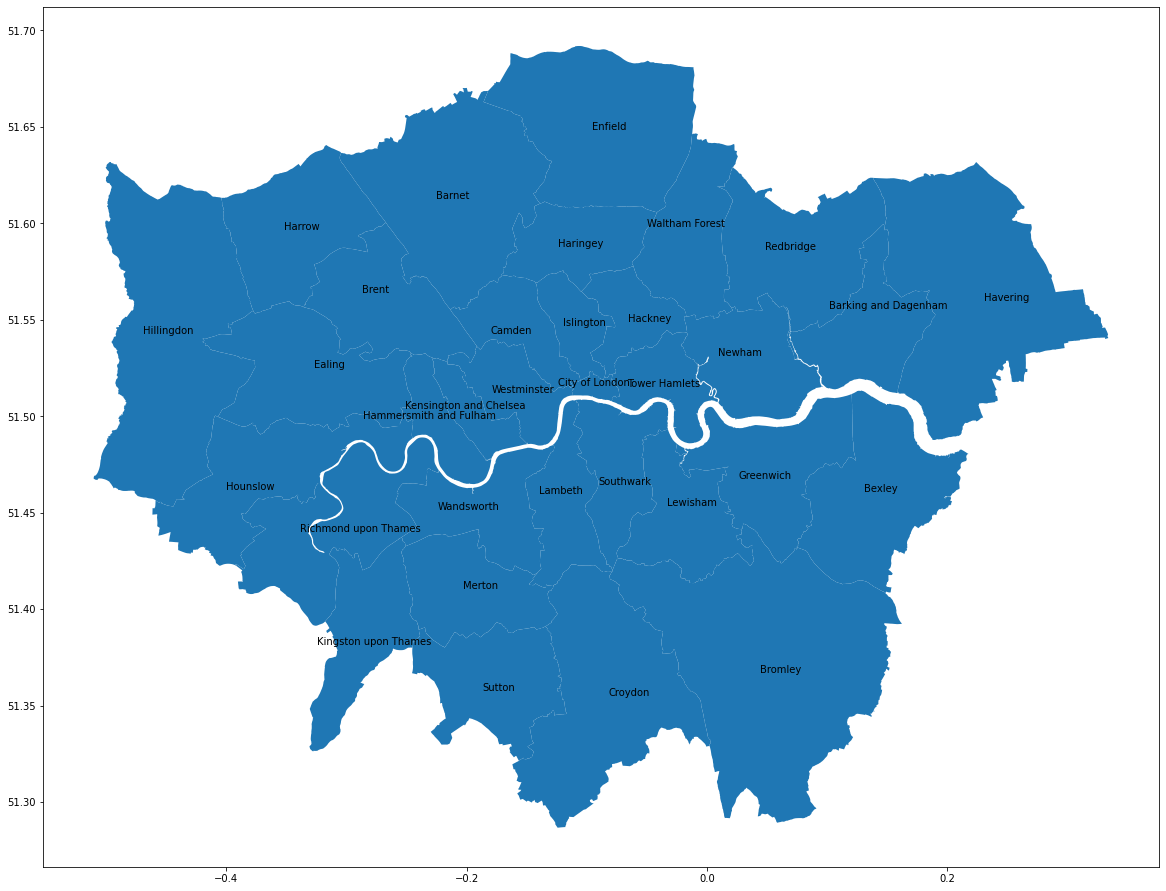

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
london_boroughs= df_boroughs.name
df_boroughs['coords'] = df_boroughs['geometry'].apply(lambda x: x.representative_point().coords[:])
df_boroughs['coords'] = [coords[0] for coords in df_boroughs['coords']]
df_boroughs.plot(ax=ax)
for idx, row in df_boroughs.iterrows():
    plt.annotate(text=row['name'], xy=row['coords'],
                 horizontalalignment='center')

In [13]:
X_test = pd.read_pickle("data/X_test_2.pkl")
X_train = pd.read_pickle("data/X_train_2.pkl")
y_test = pd.read_pickle("data/y_test_2.pkl")
y_train = pd.read_pickle("data/y_train_2.pkl")
X = pd.concat([X_test, X_train])
Y = pd.concat([y_test, y_train])
X['y'] = Y

In [14]:
LSOA_serious_fatal_rate = (X.groupby(["LSOA_of_Accident_Location"]).size().reset_index(name="counts"))
LSOA_y = X.groupby(["LSOA_of_Accident_Location", "y"]).size().reset_index(name="counts")
LSOA_y = LSOA_y[LSOA_y["y"] == 1].reset_index()
LSOA_serious_fatal_rate["serious_fatal_rate"] = (100 * LSOA_y["counts"] / LSOA_serious_fatal_rate["counts"])
LSOA_serious_fatal_rate.columns = ["geo_code", "counts", "serious_fatal_rate"]
london_LSOA_geo = pd.merge(london_LSOA_geo, LSOA_serious_fatal_rate, on="geo_code", how="left")
london_LSOA_geo

,geo_code,geo_label_x,geo_labelw,label,name,geometry,LSOA,median,mean,count,std,p25,p75,min,max,impact,geo_label_y,borough,coords,counts,serious_fatal_rate
0,E01003513,Newham 035D,None,E92000001E09000025E01003513,Newham 035D,"POLYGON ((541893.189 181249.621, 541900.568 18...",E01003513,-0.224535,-0.141502,40.0,0.265293,-0.285316,-0.137120,-0.336344,0.894112,0,Newham 035D,Newham,"(541979.6396649338, 181163.733)",40,7.500000
1,E01001159,Croydon 002C,None,E92000001E09000008E01001159,Croydon 002C,"POLYGON ((532233.977 170474.976, 532229.824 17...",E01001159,-0.159885,-0.017743,70.0,0.354303,-0.223540,0.051143,-0.461480,0.832640,0,Croydon 002C,Croydon,"(532262.5344090081, 170188.9005)",70,14.285714
2,E01002714,Islington 017D,None,E92000001E09000019E01002714,Islington 017D,"POLYGON ((530778.966 184215.275, 530780.181 18...",E01002714,-0.183521,0.065751,39.0,0.473958,-0.235692,0.098991,-0.387202,1.113637,0,Islington 017D,Islington,"(530800.373839434, 184095.892)",39,23.076923
3,E01002061,Haringey 036A,None,E92000001E09000014E01002061,Haringey 036A,"POLYGON ((531269.550 188183.770, 531269.914 18...",E01002061,-0.176935,-0.176935,2.0,0.318526,-0.289551,-0.064319,-0.402167,0.048297,0,Haringey 036A,Haringey,"(531202.923534069, 188001.582)",2,0.000000
4,E01000696,Bromley 007E,None,E92000001E09000006E01000696,Bromley 007E,"POLYGON ((544100.850 170609.733, 544142.301 17...",E01000696,-0.060323,0.030046,204.0,0.272999,-0.164070,0.104901,-0.363840,0.988573,0,Bromley 007E,Bromley,"(544291.5406454257, 169593.497)",204,11.764706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4828,E01001397,Enfield 035C,None,E92000001E09000010E01001397,Enfield 035C,"POLYGON ((531926.964 192520.538, 531931.050 19...",E01001397,-0.246729,-0.205605,138.0,0.184706,-0.294953,-0.208472,-0.390094,0.768227,0,Enfield 035C,Enfield,"(531779.8178333334, 192285.4)",138,2.898551
4829,E01002498,Hillingdon 033C,None,E92000001E09000017E01002498,Hillingdon 033C,"POLYGON ((511377.000 185686.000, 511373.374 18...",E01002498,-0.289041,-0.269178,23.0,0.095871,-0.303055,-0.271696,-0.372334,0.106164,0,Hillingdon 033C,Hillingdon,"(511684.1028766844, 185791.2865)",23,0.000000
4830,E01002456,Hillingdon 017C,None,E92000001E09000017E01002456,Hillingdon 017C,"POLYGON ((507541.612 183616.187, 507541.781 18...",E01002456,-0.231086,-0.180541,34.0,0.214711,-0.285285,-0.180637,-0.376571,0.849408,0,Hillingdon 017C,Hillingdon,"(507675.4738008437, 183167.462)",34,2.941176
4831,E01003084,Lambeth 030B,None,E92000001E09000022E01003084,Lambeth 030B,"POLYGON ((531528.786 171783.590, 531526.879 17...",E01003084,-0.213315,0.006447,17.0,0.551950,-0.411858,0.044757,-0.465930,1.126832,0,Lambeth 030B,Lambeth,"(531744.7385102133, 171776.674)",17,23.529412


In [15]:
london_LSOA_geo['count_below_10'] = np.where(london_LSOA_geo['counts'] < 10,1,0)

<AxesSubplot:>

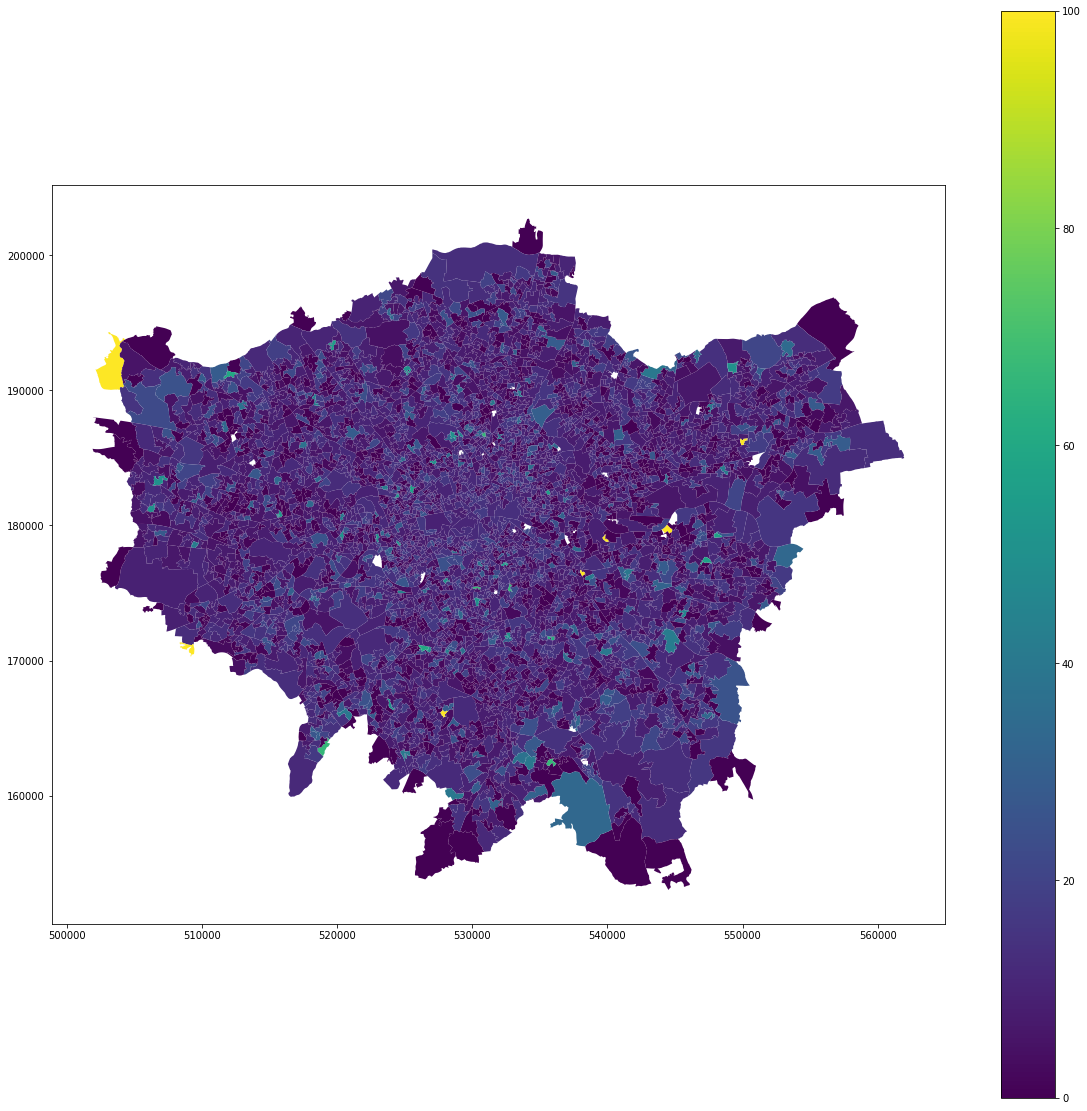

In [16]:
pd.options.display.max_columns = None

fig, ax = plt.subplots(1, 1, figsize=(20, 20))
london_LSOA_geo['coords'] = london_LSOA_geo['geometry'].apply(lambda x: x.representative_point().coords[:])
london_LSOA_geo['coords'] = [coords[0] for coords in london_LSOA_geo['coords']]
london_LSOA_geo.plot(ax=ax,column='serious_fatal_rate',legend=True)

<AxesSubplot:>

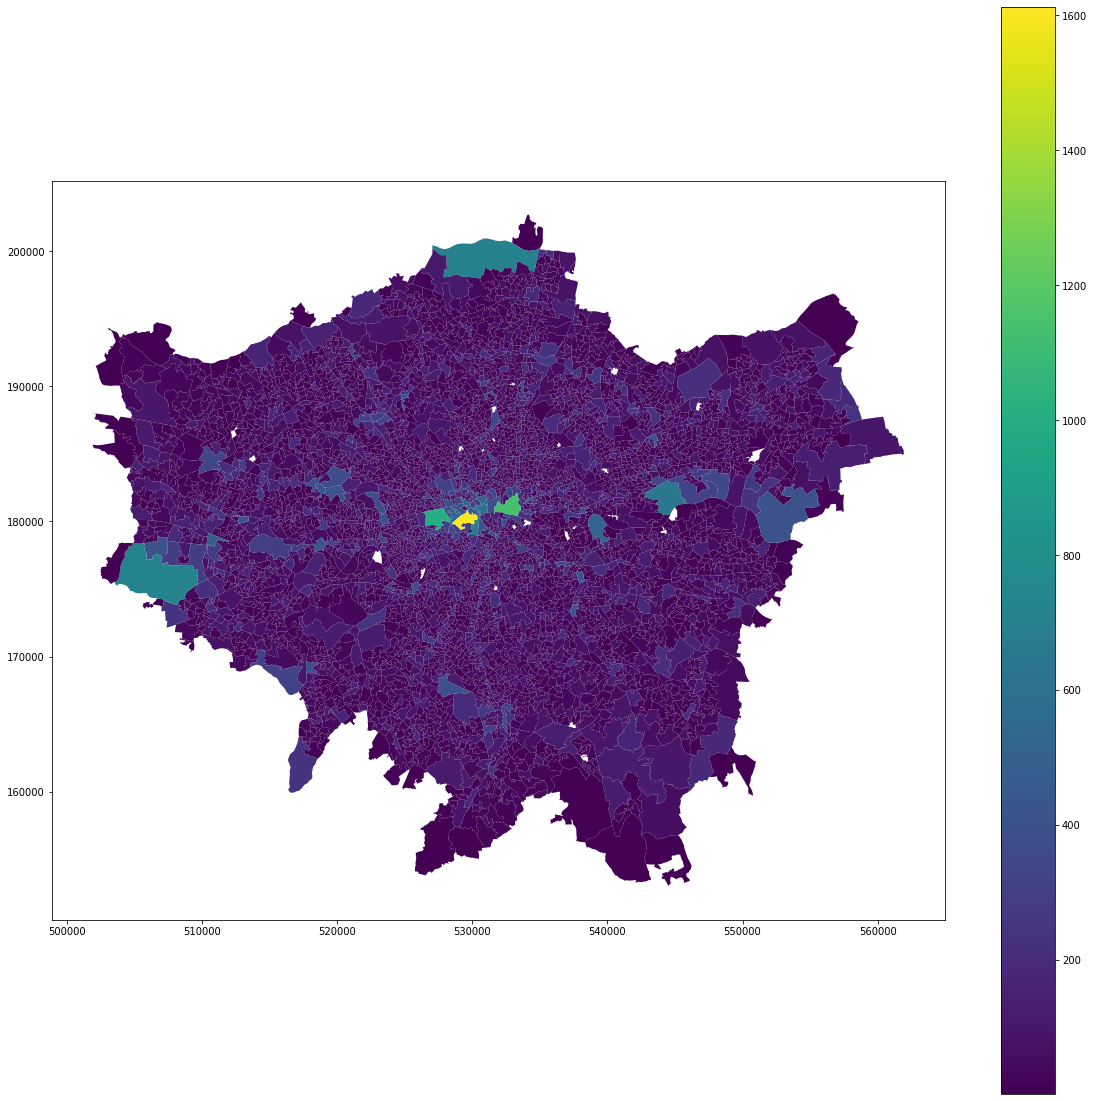

In [17]:
pd.options.display.max_columns = None

fig, ax = plt.subplots(1, 1, figsize=(20, 20))
london_LSOA_geo['coords'] = london_LSOA_geo['geometry'].apply(lambda x: x.representative_point().coords[:])
london_LSOA_geo['coords'] = [coords[0] for coords in london_LSOA_geo['coords']]
london_LSOA_geo.plot(ax=ax,column='counts',legend=True)

<AxesSubplot:>

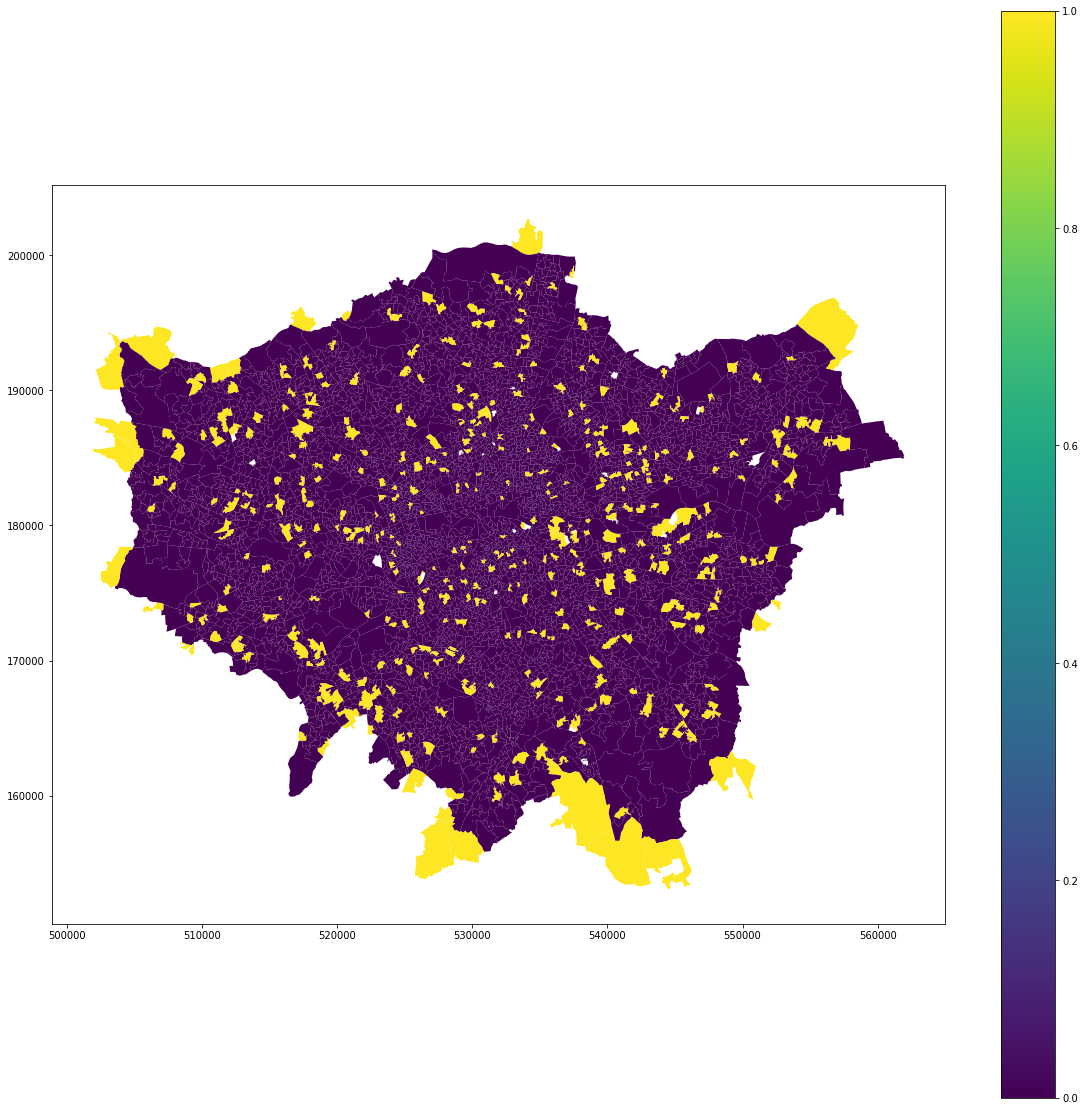

In [18]:
pd.options.display.max_columns = None

fig, ax = plt.subplots(1, 1, figsize=(20, 20))
london_LSOA_geo['coords'] = london_LSOA_geo['geometry'].apply(lambda x: x.representative_point().coords[:])
london_LSOA_geo['coords'] = [coords[0] for coords in london_LSOA_geo['coords']]
london_LSOA_geo.plot(ax=ax,column='count_below_10',legend=True)

In [19]:
london_LSOA_geo.iloc[0,:]

geo_code                                                      E01003513
geo_label_x                                                 Newham 035D
geo_labelw                                                         None
label                                       E92000001E09000025E01003513
name                                                        Newham 035D
geometry              POLYGON ((541893.189 181249.621, 541900.568 18...
LSOA                                                          E01003513
median                                                        -0.224535
mean                                                          -0.141502
count                                                              40.0
std                                                            0.265293
p25                                                           -0.285316
p75                                                            -0.13712
min                                                           -0

# remove map cell output before committing to git
# otherwise plotting.ipynb is above 100mb

In [ ]:
def style(feature):
    col = ['#440154','#fde725']
    feature["properties"]["impact"]
    ss = {
        "fillColor": col[feature["properties"]["impact"]],
        "fillOpacity": 0.3,
        "weight": 0.8,
        "color": col[feature["properties"]["impact"]],
    }
    return ss

import folium
map1 = folium.Map(location=[ 51.509865,-0.118092], zoom_start=10)
folium.GeoJson(london_LSOA_geo,style_function=style, name='geojson').add_to(map1)
map1
#map.save("./plots/geomap_overplot.html")



In [26]:
import io
from PIL import Image

img_data = map1._to_png(35)
img = Image.open(io.BytesIO(img_data))
img.save("./plots/geomap_overplot0.png")

In [22]:
# import folium
# map = folium.Map(location=locationlist[7], zoom_start=12)
# for point in range(0, 100):#len(locationlist)):
#     folium.Marker(locationlist[point], popup=df.Accident_Index[point]).add_to(map)
# map

In [23]:
# from folium.plugins import MarkerCluster
# map2 = folium.Map(location=locationlist[7], tiles='Stamen Terrain', zoom_start=11)

# marker_cluster = MarkerCluster().add_to(map2)

# for point in range(0, 10000):
#     folium.Marker(locationlist[point], popup=df.Accident_Index[point], icon=folium.Icon(color='darkblue', icon_color='white', icon='male', angle=0, prefix='fa')).add_to(marker_cluster)
# map2


In [24]:
# df.groupby('Accident_Severity')['Accident_Index'].nunique()
# #1389724
# #print(18221 + 187146 +1184357)